In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\ASUS iD\AppData\Local\Temp\ipykernel_22624\2447234173.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load dataset

In [3]:
data = pd.read_csv('data.csv', encoding='latin-1' )

alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)

alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'placement'})



In [4]:
print("Shape: ", data.shape)
data.head(15)

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


In [6]:
df_abusive = pd.read_csv('abusive.csv')

In [7]:
df_abusive

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


count HateSpeach (HS)

In [10]:
data.HS.value_counts()

HS
0    7608
1    5561
Name: count, dtype: int64

Count Abusive

In [11]:
data.Abusive.value_counts()

Abusive
0    8126
1    5043
Name: count, dtype: int64

count Toxic Shape

In [12]:
print("Toxic shape: ", data[(data['HS'] == 1) | (data['Abusive'] == 1)].shape)

print("Non toxic shape: ", data[(data['HS'] == 0) & (data['Abusive'] == 0)].shape)

Toxic shape:  (7309, 13)
Non toxic shape:  (5860, 13)


In [13]:
print("Shape: ", alay_dict.shape)
alay_dict.head(15)

Shape:  (15167, 2)


,original,placement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
5,aamiin,amin
6,aamiinn,amin
7,aamin,amin
8,aammiin,amin
9,abis,habis


Preprocessing

In [19]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n', ' ',text) # remove every \n 
    
    text = re.sub('rt', ' ',text) # remove every retweet symbol
    
    text = re.sub('user', ' ',text) # remove every username
    
    text = re.sub('((www\.[^\s]+)| (https?://[^\s]+) | (http?://[^\s]+))', ' ',text) # remove every url
    
    text = re.sub('  +', ' ',text) # remove extra sppaces
    
    return text

def remove_nonalphabet(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    
    return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['placement']))

def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ') ])


def stemming(text):
    return stemmer.stem(text)


In [20]:
print ("remove_nonalphabet: ", remove_nonalphabet("Halooooooo,,,,,,, duniaaa!!"))

print("lowercase: ", lowercase("Haloo, duniaa!"))

print("Stemming: ", stemming("Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan"))

print("remove_unnecessary_char: ", remove_unnecessary_char("Hehehehe \n\n RRT USER USER apa kabs www.google.com\n hehe"))

print("normalize_alay: ", normalize_alay("aamiin adek abis"))

remove_nonalphabet:  Halooooooo duniaaa 
lowercase:  haloo, duniaa!
Stemming:  ekonomi indonesia sedang dalam tumbuh yang bangga
remove_unnecessary_char:  Hehehehe RRT USER USER apa kabs hehe
normalize_alay:  amin adik habis


Memilih fitur dan target

In [5]:
fitur = data[['HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']]
target = data['HS']

Memisahkan data menjadi data latih dan data uji

In [8]:
X_train, X_test, y_train, y_test = train_test_split(fitur, target, test_size=0.2, random_state=42)

Membangun model Decision Tree Classifier

In [9]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Melakukan prediksi pada data uji

In [10]:
y_pred = model.predict(X_test)

Evaluasi model

In [11]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1516    0]
 [   0 1118]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1516
           1       1.00      1.00      1.00      1118

    accuracy                           1.00      2634
   macro avg       1.00      1.00      1.00      2634
weighted avg       1.00      1.00      1.00      2634



Fungsi untuk menampilkan confusion matrix

In [12]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

Memanggil fungsi plot_confusion_matrix

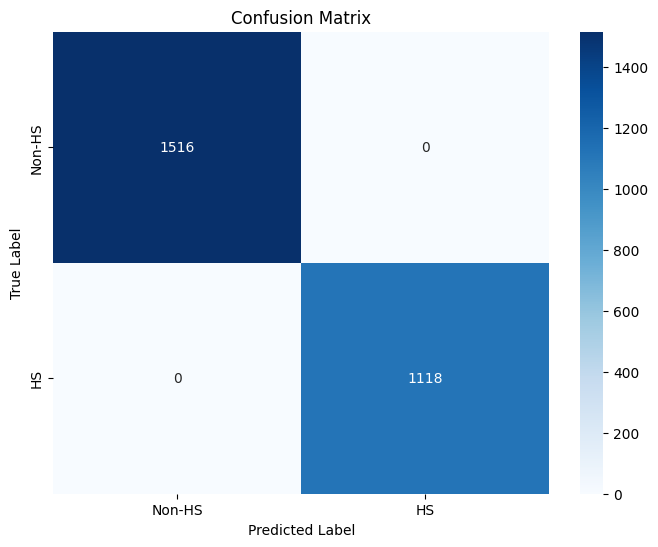

In [15]:

plot_confusion_matrix(y_test, y_pred, classes=['Non-HS', 'HS'])

Menghitung statistik deskriptif untuk kolom-kolom numerik

In [16]:
deskripsi_statistik = data[['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']].describe()

Menampilkan hasil

In [17]:
print(deskripsi_statistik)

                 HS       Abusive  HS_Individual      HS_Group   HS_Religion  \
count  13169.000000  13169.000000   13169.000000  13169.000000  13169.000000   
mean       0.422280      0.382945       0.271471      0.150809      0.060217   
std        0.493941      0.486123       0.444735      0.357876      0.237898   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.000000      0.000000       0.000000      0.000000      0.000000   
50%        0.000000      0.000000       0.000000      0.000000      0.000000   
75%        1.000000      1.000000       1.000000      0.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

            HS_Race   HS_Physical     HS_Gender      HS_Other       HS_Weak  \
count  13169.000000  13169.000000  13169.000000  13169.000000  13169.000000   
mean       0.042980      0.024527      0.023236      0.284000      0.256891   
std        0.202819      0.154685      0.1

Visualisasi histogram untuk kolom HS


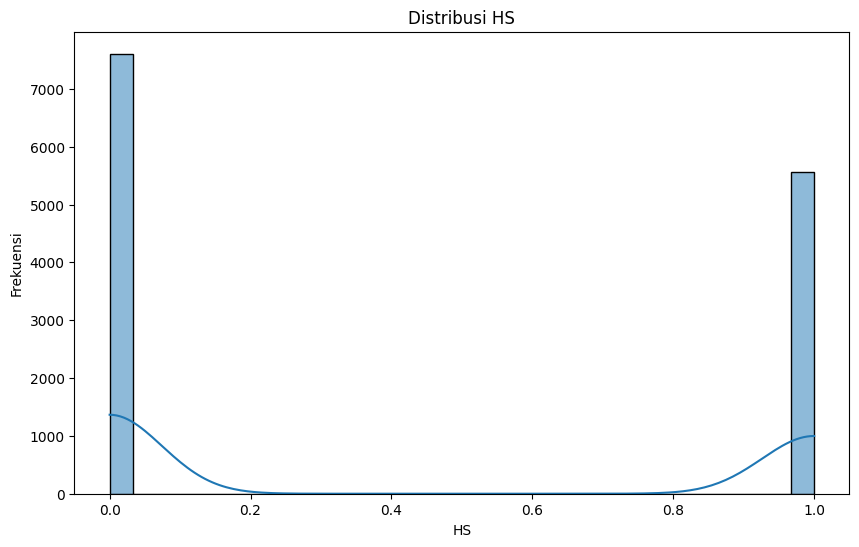

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['HS'], bins=30, kde=True)
plt.title('Distribusi HS')
plt.xlabel('HS')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['HS'], bins=30, kde=True)
plt.title('Distribusi HS')
plt.xlabel('HS')
plt.ylabel('Frekuensi')
plt.show()

Visualisasi boxplot untuk beberapa kolom numerik

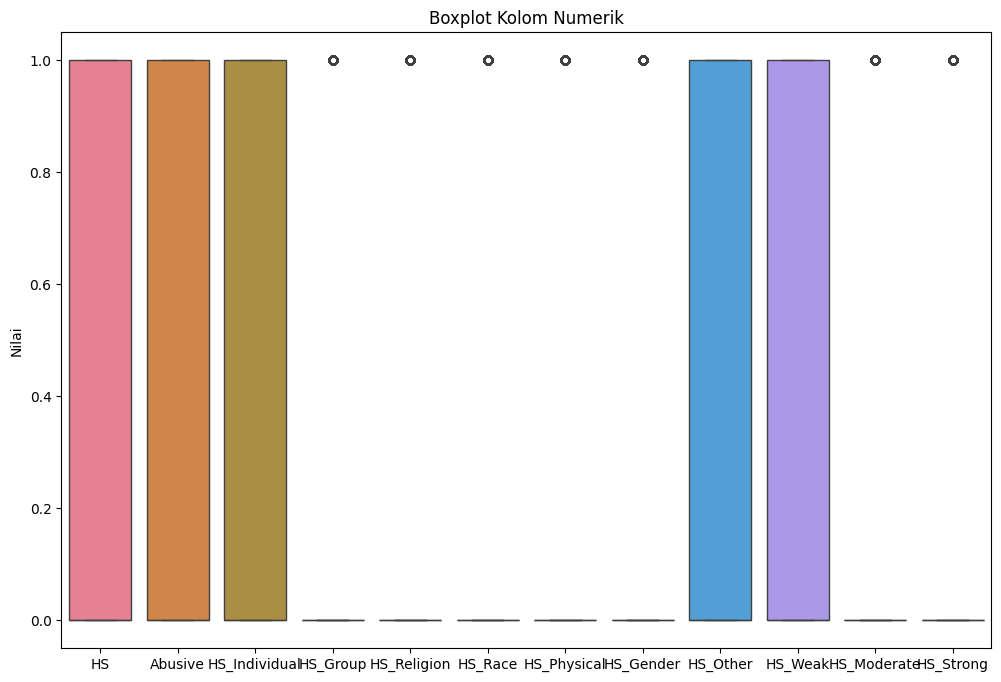

In [19]:
kolom_numerik = ['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[kolom_numerik])
plt.title('Boxplot Kolom Numerik')
plt.ylabel('Nilai')
plt.show()

Visualisasi histogram untuk kolom numerik

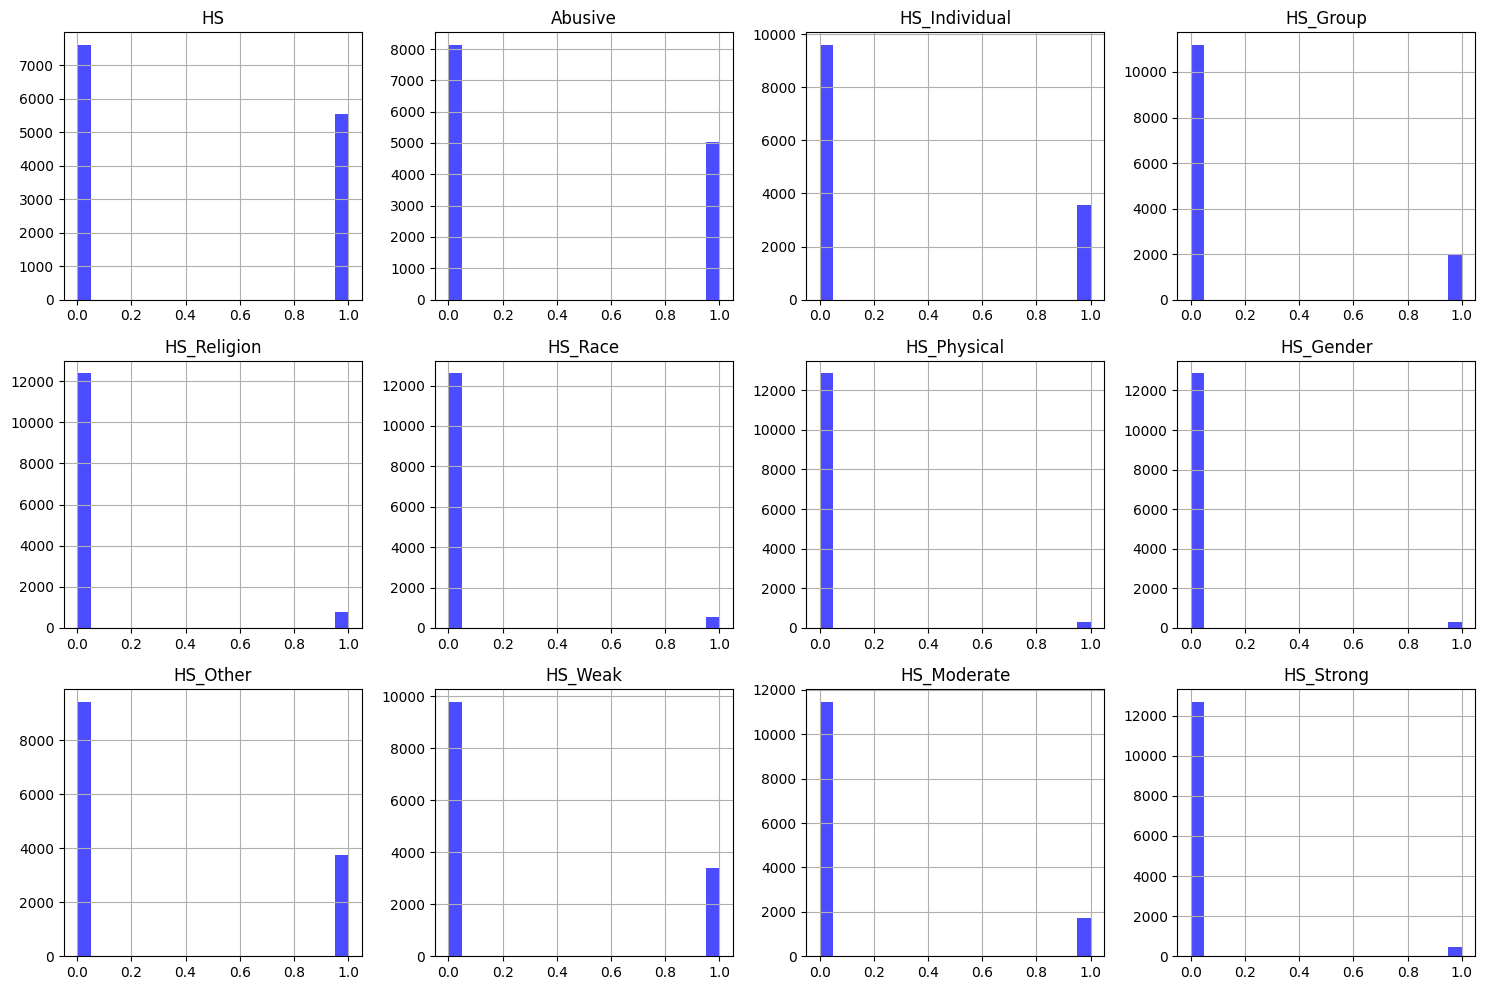

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
data[['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']].hist(ax=axes, bins=20, color='blue', alpha=0.7)
plt.tight_layout()
plt.show()

Visualisasi korelasi antar kolom numerik (Heatmap)

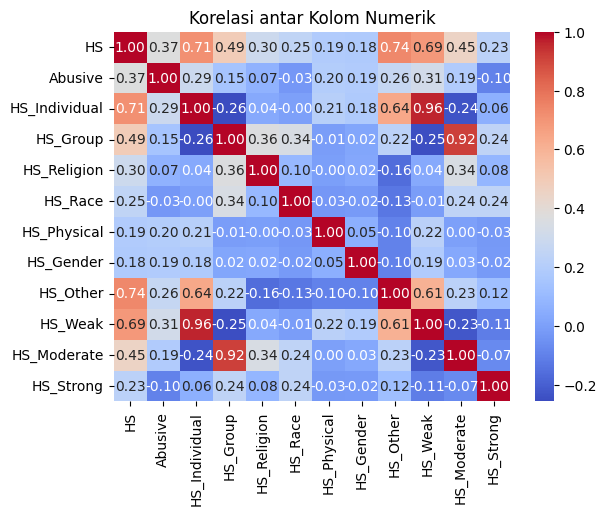

In [21]:
corr_matrix = data[['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar Kolom Numerik')
plt.show()